In [53]:
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [54]:
dataset = p.read_excel(r'C:\Users\student\Desktop\RIAA-1\data\RFM.xlsx')
dataset.head()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary
0,0,12347,40,2,35.9
1,1,12350,310,1,40.0
2,2,12352,262,1,17.4
3,3,12357,33,2,110.7
4,4,12359,58,2,33.0


In [55]:
Churn_period = 180
Churn_period

180

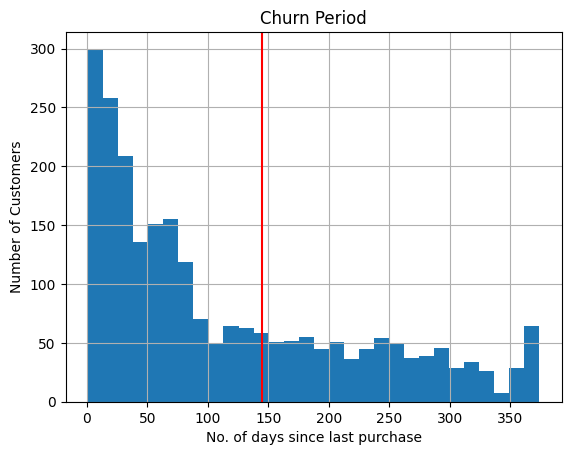

In [56]:
dataset['Recency'].hist(bins=30)
pl.axvline(145, color='r')
pl.title('Churn Period')
pl.xlabel('No. of days since last purchase')
pl.ylabel('Number of Customers')
pl.show()

In [57]:
dataset['Churned'] = (dataset['Recency']>Churn_period).astype('int64')

In [61]:
x = dataset[['Recency', 'Frequency', 'Monetary']]
y = dataset['Churned']

scaling_model = MinMaxScaler()
x_scaled = scaling_model.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.4, random_state=43)


In [62]:
classification_model = LogisticRegression(class_weight='balanced')
classification_model.fit(x_train, y_train)

y_predict = classification_model.predict(x_test)
print('classification_report')
print(classification_report(y_test, y_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict))
print('Accuracy Score')
print(accuracy_score(y_test, y_predict)*100)



classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       702
           1       1.00      0.99      1.00       251

    accuracy                           1.00       953
   macro avg       1.00      1.00      1.00       953
weighted avg       1.00      1.00      1.00       953

Confusion Matrix
[[702   0]
 [  2 249]]
Accuracy Score
99.79013641133263


In [63]:
dataset['Churned'].value_counts(normalize=True)

Churned
0    0.738765
1    0.261235
Name: proportion, dtype: float64

In [90]:
classification_model.predict([[185, 1, 100]])

c:\Users\student\Desktop\RIAA-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  message = "The feature names should match those that were passed during fit.\n"


array([1])